In [3]:
pwd

'/public/huangwei/test/autokeras'

# 结构化数据回归

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

import autokeras as ak

In [2]:
gpus = tf.config.list_physical_devices("GPU")

if gpus:
   
    gpu0 = gpus[2] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    # 或者也可以设置GPU显存为固定使用量(例如：4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU") 

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

## 一个简单的例子

第一步是准备数据。 这里我们以加州住房数据集为例。

In [4]:
house_dataset = fetch_california_housing()

In [7]:
house_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
)

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"

第二步是运行 StructuredDataRegressor。 作为一个快速演示，我们将 epochs 设置为 10。您也可以为自适应数量的 epochs 保留未指定的 epochs。

In [9]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)  # It tries 3 different models.

In [10]:
# Feed the structured data regressor with training data.
reg.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "Price",
    epochs=10,
)

Trial 3 Complete [00h 01m 31s]
val_loss: 0.7858144640922546

Best val_loss So Far: 0.7568506598472595
Total elapsed time: 00h 04m 39s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 9s 15ms/step - loss: 0.8547 - mean_squared_error: 0.8547
Epoch 2/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5989 - mean_squared_error: 0.5989
Epoch 3/10
581/581 [==============================] - 8s 15ms/step - loss: 0.5449 - mean_squared_error: 0.5449
Epoch 4/10
581/581 [==============================] - 8s 15ms/step - loss: 0.5240 - mean_squared_error: 0.5240
Epoch 5/10
581/581 [==============================] - 8s 15ms/step - loss: 0.5128 - mean_squared_error: 0.5128
Epoch 6/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5162 - mean_squared_error: 0.5162
Epoch 7/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5030 - mean_squared_error: 0.5030
Epoch 8/10
581/581 [==============================]

In [11]:
# Predict with the best model.
predicted_y = reg.predict(test_file_path)

65/65 [==============================] - 0s 7ms/step


In [12]:
# Evaluate the best model with testing data.
print(reg.evaluate(test_file_path, "Price"))

65/65 [==============================] - 1s 12ms/step - loss: 0.6181 - mean_squared_error: 0.6181
[0.6181397438049316, 0.6181397438049316]


## 数据格式

AutoKeras StructuredDataRegressor 对于数据格式非常灵活。

上面的例子展示了如何直接使用 CSV 文件。 除了 CSV 文件，它还支持 numpy.ndarray、pandas.DataFrame 或 tf.data.Dataset。 数据应该是带有数值或分类值的二维数据。

对于回归目标，它应该是数值向量。 AutoKeras 接受 numpy.ndarray、pandas.DataFrame 或 pandas.Series。

以下示例展示了如何使用 numpy.ndarray、pandas.DataFrame 和 tensorflow.data.Dataset 准备数据。

In [13]:
# x_train as pandas.DataFrame, y_train as pandas.Series
x_train = pd.read_csv(train_file_path)
print(type(x_train))  # pandas.DataFrame

<class 'pandas.core.frame.DataFrame'>


In [14]:
y_train = x_train.pop("Price")
print(type(y_train))  # pandas.Series

<class 'pandas.core.series.Series'>


In [15]:
# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

<class 'pandas.core.frame.DataFrame'>


In [16]:
# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
# Preparing testing data.
x_test = pd.read_csv(test_file_path)
y_test = x_test.pop("Price")

In [ ]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)

In [18]:
# Feed the structured data regressor with training data.
reg.fit(x_train, y_train, epochs=10)

In [19]:
# Predict with the best model.
predicted_y = reg.predict(x_test)

65/65 [==============================] - 0s 7ms/step


In [20]:
# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

65/65 [==============================] - 1s 12ms/step - loss: 0.6181 - mean_squared_error: 0.6181
[0.6181397438049316, 0.6181397438049316]


以下代码显示了如何将 numpy.ndarray 转换为 tf.data.Dataset。

In [22]:
train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test, y_test))

reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)

In [23]:
# Feed the tensorflow Dataset to the regressor.
reg.fit(train_set, epochs=10)

Trial 3 Complete [00h 01m 34s]
val_loss: 0.8734071254730225

Best val_loss So Far: 0.8734071254730225
Total elapsed time: 00h 04m 41s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 9s 15ms/step - loss: 1.2528 - mean_squared_error: 1.2528
Epoch 2/10
581/581 [==============================] - 9s 15ms/step - loss: 0.6241 - mean_squared_error: 0.6241
Epoch 3/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5600 - mean_squared_error: 0.5600
Epoch 4/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5349 - mean_squared_error: 0.5349
Epoch 5/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5202 - mean_squared_error: 0.5202
Epoch 6/10
581/581 [==============================] - 9s 15ms/step - loss: 0.5084 - mean_squared_error: 0.5084
Epoch 7/10
581/581 [==============================] - 9s 15ms/step - loss: 0.4996 - mean_squared_error: 0.4996
Epoch 8/10
581/581 [==============================]

In [24]:
# Predict with the best model.
predicted_y = reg.predict(test_set)

65/65 [==============================] - 1s 7ms/step


In [25]:
# Evaluate the best model with testing data.
print(reg.evaluate(test_set))

65/65 [==============================] - 1s 12ms/step - loss: 0.5851 - mean_squared_error: 0.5851
[0.585136890411377, 0.585136890411377]


您还可以指定数据的列名和类型，如下所示。 如果训练数据已经有列名，则 column_names 是可选的，例如 pandas.DataFrame，CSV 文件。 任何未指定类型的列都将从训练数据中推断出来。

In [26]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    column_names=[
        "MedInc",
        "HouseAge",
        "AveRooms",
        "AveBedrms",
        "Population",
        "AveOccup",
        "Latitude",
        "Longitude",
    ],
    column_types={"MedInc": "numerical", "Latitude": "numerical"},
    max_trials=10,  # It tries 10 different models.
    overwrite=True,
)

## 验证数据

默认情况下，AutoKeras 使用最后 20% 的训练数据作为验证数据。 如下例所示，您可以使用validation_split 来指定百分比。

In [27]:
reg.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

Trial 10 Complete [00h 01m 33s]
val_loss: 0.6876036524772644

Best val_loss So Far: 0.6747000813484192
Total elapsed time: 00h 15m 36s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 9s 15ms/step - loss: 0.8728 - mean_squared_error: 0.8728
Epoch 2/10
581/581 [==============================] - 8s 15ms/step - loss: 0.6805 - mean_squared_error: 0.6805
Epoch 3/10
581/581 [==============================] - 8s 15ms/step - loss: 0.6657 - mean_squared_error: 0.6657
Epoch 4/10
581/581 [==============================] - 8s 15ms/step - loss: 0.6253 - mean_squared_error: 0.6253
Epoch 5/10
581/581 [==============================] - 8s 15ms/step - loss: 0.5942 - mean_squared_error: 0.5942
Epoch 6/10
581/581 [==============================] - 8s 15ms/step - loss: 0.5689 - mean_squared_error: 0.5689
Epoch 7/10
581/581 [==============================] - 8s 15ms/step - loss: 0.5602 - mean_squared_error: 0.5602
Epoch 8/10
581/581 [==============================

您还可以使用您自己的验证集，而不是使用validation_data 将其从训练数据中分离出来。

In [ ]:
split = 500
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]
reg.fit(
    x_train,
    y_train,
    # Use your own validation set.
    validation_data=(x_val, y_val),
    epochs=10,
)

## 自定义搜索空间

对于高级用户，您可以使用 AutoModel 而不是 StructuredDataRegressor 来自定义您的搜索空间。 您可以为一些高级配置配置 StructuredDataBlock，例如，categorical_encoding 是否使用 CategoricalToNumerical。 您也可以不指定这些参数，这将使不同的选择自动调整。 有关详细信息，请参阅以下示例。

In [ ]:
input_node = ak.StructuredDataInput()
output_node = ak.StructuredDataBlock(categorical_encoding=True)(input_node)
output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=3
)
reg.fit(x_train, y_train, epochs=10)

AutoModel 的用法类似于 Keras 的函数式 API。 基本上，您正在构建一个图，其边是块，节点是块的中间输出。 使用 output_node = ak.[some_block]([block_args])(input_node) 添加从 input_node 到 output_node 的边。

您甚至还可以使用更细粒度的块来进一步自定义搜索空间。 请参阅以下示例。

In [ ]:
input_node = ak.StructuredDataInput()
output_node = ak.CategoricalToNumerical()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.RegressionHead()(output_node)
reg = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=3, overwrite=True
)
reg.fit(x_train, y_train, epochs=10)

您还可以将 AutoKeras 找到的最佳模型导出为 Keras 模型。

In [28]:
model = reg.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 8)                 0         
_________________________________________________________________
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
re_lu (ReLU)                 (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [29]:
from tensorflow.keras.utils import plot_model

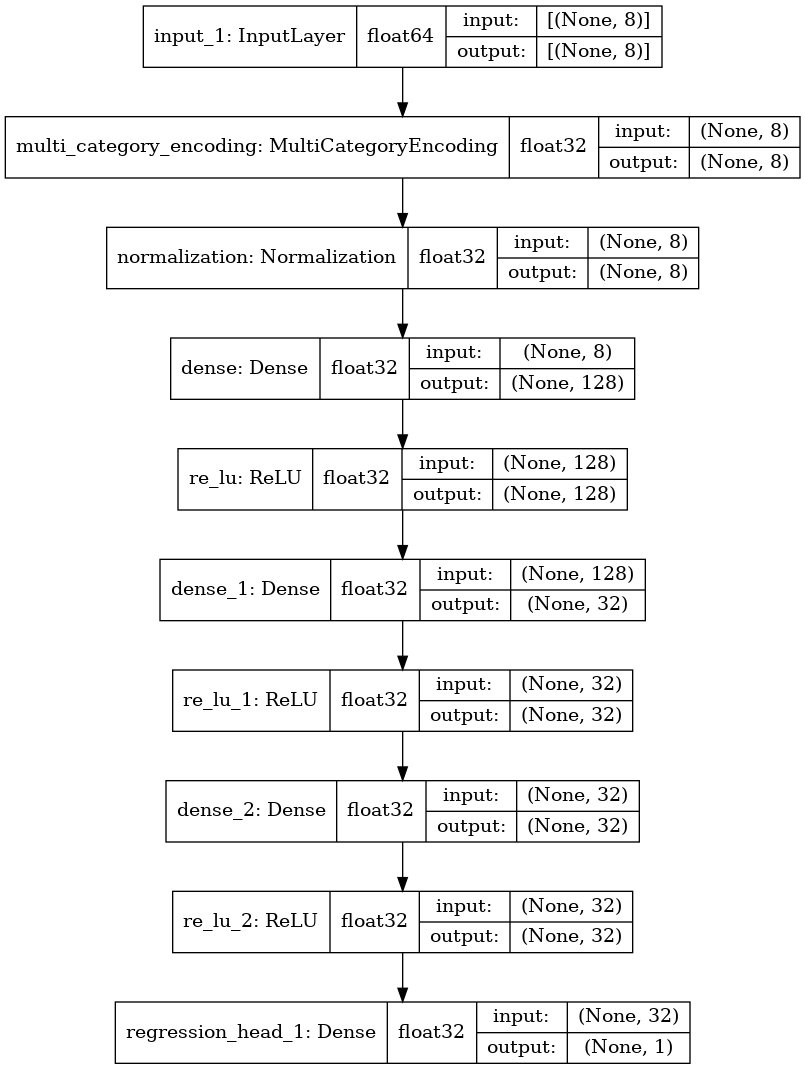

In [31]:
plot_model(model, show_dtype=True, show_shapes=True)

In [32]:
# numpy array in object (mixed type) is not supported.
# you need convert it to unicode or float first.
model.predict(x_train)

array([[5.000498 ],
       [5.489713 ],
       [4.8057857],
       ...,
       [1.5242534],
       [1.9043915],
       [1.8700457]], dtype=float32)